# Quantium Task 1: Data preparation and customer analytics

## Task Overview  
We need to present a strategic recommendation to Julia that is supported by data, which she can then use for the upcoming category review. The client is particularly interested in customer segments and their chip purchasing behavior. To achieve this, we need to analyze the data to understand the current purchasing trends and behaviors.  

Steps to Follow  
Download and Load Data  

Download the provided CSV data files.  
Load the data into a pandas DataFrame.  
High-Level Data Checks  

Summary Statistics: Create and interpret high-level summaries of the data to understand its structure and key metrics.  
Outlier Detection: Identify and remove outliers that could skew the analysis.  
Data Formats: Check and correct data formats to ensure consistency and accuracy.   

### Feature Engineering  
  
Pack Size: Derive the pack size from the product descriptions.  
Brand Name: Extract brand names from the product descriptions.  
Define Metrics of Interest: 
  
Total Spend: Calculate the total spend for each customer.  
Average Spend per Transaction: Determine the average spend per transaction.  
Frequency of Purchases: Analyze the frequency of purchases.  
Preferred Pack Size: Identify the preferred pack size for different customer segments.  
Brand Preference: Assess brand preferences across customer segments.  
### Segment Analysis  

Segment customers based on purchasing behavior.  
Analyze spend and behavior for each segment to draw insights.  
### Strategic Recommendations  
   
Formulate a strategy based on the findings.  
Provide clear and commercially viable recommendations to Julia, the Category Manager.  model answer.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings

# Filter out the FutureWarning
warnings.filterwarnings("ignore", category=FutureWarning)



In [2]:
#QVI purchase data
qvi_p = pd.read_csv('QVI_purchase.csv')
qvi_p.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# Data Cleaning Section

In [3]:
#QVI transaction data
qvi_t=pd.read_excel('QVI_transaction.xlsx', engine='openpyxl')
qvi_t.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


Below lines of code is checking the shape first to see how many rows and columns, then for any null values or duplicate rows.

In [4]:
qvi_p.shape

(72637, 3)

In [5]:
qvi_t.shape

(264836, 8)

In [6]:
qvi_p.isna().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [7]:
qvi_t.isna().sum()

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

In [8]:
qvi_p.duplicated().sum()

0

In [9]:
qvi_t.duplicated().sum()

1

In [10]:
qvi_t = qvi_t.drop_duplicates()

In [11]:
qvi_t.duplicated().sum()

0

There was one duplicate row in qvi_t and now it is removed.

In [12]:
qvi_p.dtypes

LYLTY_CARD_NBR       int64
LIFESTAGE           object
PREMIUM_CUSTOMER    object
dtype: object

In [13]:
qvi_t.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

Just checked to make sure all column types are correct.

In [14]:
pd.to_datetime(qvi_t.DATE)

0        1970-01-01 00:00:00.000043390
1        1970-01-01 00:00:00.000043599
2        1970-01-01 00:00:00.000043605
3        1970-01-01 00:00:00.000043329
4        1970-01-01 00:00:00.000043330
                      ...             
264831   1970-01-01 00:00:00.000043533
264832   1970-01-01 00:00:00.000043325
264833   1970-01-01 00:00:00.000043410
264834   1970-01-01 00:00:00.000043461
264835   1970-01-01 00:00:00.000043365
Name: DATE, Length: 264835, dtype: datetime64[ns]

Can't make any sense of date column. It is an integer format, and cant be converted to datetime with sensible values.  
Will have to ignore DATE column for now.

In [15]:
qvi_t.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264835.000000,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000
mean,43464.036600,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205
std,105.389336,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


PROD_QTY and TOT_SALES have very high max values compared to the quartiles, I will graphically see whats going on.

<Axes: xlabel='PROD_QTY', ylabel='Count'>

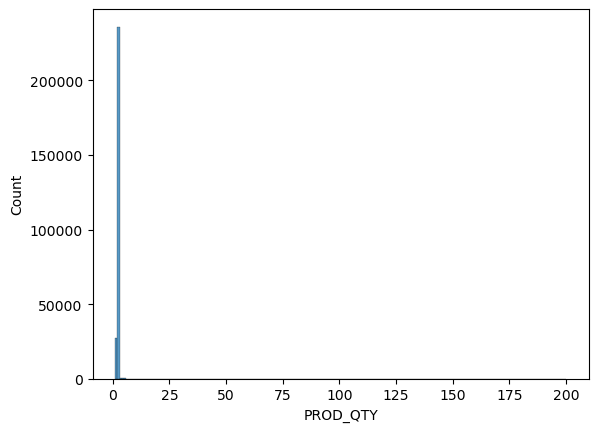

In [16]:
sns.histplot(qvi_t.PROD_QTY, binwidth = 1)

In [17]:
qvi_t[qvi_t.PROD_QTY > 5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
69762,43331,226,226000,226201,4,Dorito Corn Chp Supreme 380g,200,650.0
69763,43605,226,226000,226210,4,Dorito Corn Chp Supreme 380g,200,650.0


There was one customer who on two occasions purchased a huge number of dorito corn chp supreme 380g, 200 units for 650.  
These two data points are clear outliers and skew the data as seen inthe histogram so we will remove them.

In [18]:
qvi_t = qvi_t[qvi_t.PROD_QTY < 200]

<Axes: xlabel='PROD_QTY', ylabel='Count'>

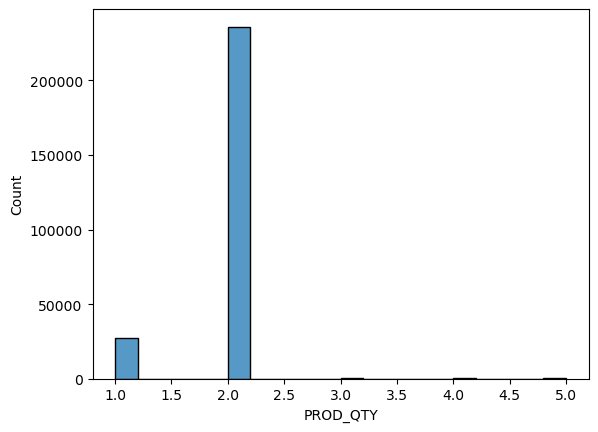

In [19]:
sns.histplot(qvi_t.PROD_QTY)

There are no outliers anymore.

In [20]:
qvi_t.PROD_NAME.value_counts()

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

In [21]:
#Creating a copy df so i have a reference point in case I alter df and want to reset.
qvi = qvi_t.copy()

In [22]:
qvi['PACK_SIZE']= qvi_t.PROD_NAME.str.extract(r'(?i)(\d+g)')

In [23]:
qvi_t.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [24]:
#remove packet size from PROD_NAME
qvi.PROD_NAME = qvi_t.PROD_NAME.str.replace(r'(\d+g)', '')

In [25]:
qvi.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175g
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175g
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170g
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175g
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150g


In [26]:
#remove g and G 
qvi['PACK_SIZE'] = qvi['PACK_SIZE'].str.replace('g', '')
qvi['PACK_SIZE'] = qvi['PACK_SIZE'].str.replace('G', '')
qvi.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150


In [27]:
qvi.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
PACK_SIZE          object
dtype: object

In [28]:
#convert packet size to float
qvi['PACK_SIZE'] = qvi['PACK_SIZE'].astype(float)

In [29]:
qvi.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
PACK_SIZE         float64
dtype: object

In [30]:
#Take first word from PROD_NAME column as brand identifier
qvi['BRAND'] = qvi.PROD_NAME.str.split().str[0]
qvi.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle


In [31]:
qvi['BRAND'].value_counts()

BRAND
Kettle        41288
Smiths        28859
Pringles      25102
Doritos       24962
Thins         14075
RRD           11894
Infuzions     11057
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Red            5885
Cheezels       4603
CCs            4551
Woolworths     4437
Dorito         3183
Infzns         3144
Smith          2963
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

I can see a few typos in brand list, RRD should be Red, Infzns should be Infuzions, Smith should be Smiths and  
Dorito should be Doritos. Lets fix these.

In [32]:
#change RRD to Red
qvi['BRAND'] = np.where(qvi['BRAND']== 'RRD', 'Red', qvi['BRAND'])

In [33]:
qvi['BRAND'] = np.where(qvi['BRAND']== 'Infzns', 'Infuzions', qvi['BRAND'])

In [34]:
qvi['BRAND'] = np.where(qvi['BRAND']== 'Smith', 'Smiths', qvi['BRAND'])

In [35]:
qvi['BRAND'] = np.where(qvi['BRAND']== 'Dorito', 'Doritos', qvi['BRAND'])

In [36]:
qvi['BRAND'].value_counts()

BRAND
Kettle        41288
Smiths        31822
Doritos       28145
Pringles      25102
Red           17779
Infuzions     14201
Thins         14075
WW            10320
Cobs           9693
Tostitos       9471
Twisties       9454
Old            9324
Tyrrells       6442
Grain          6272
Natural        6050
Cheezels       4603
CCs            4551
Woolworths     4437
Cheetos        2927
Snbts          1576
Burger         1564
GrnWves        1468
Sunbites       1432
NCC            1419
French         1418
Name: count, dtype: int64

All typos in brand column are fixed

In [37]:
qvi.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle


In [38]:
qvi_p.shape

(72637, 3)

In [39]:
qvi_p.duplicated().sum()

0

In [40]:
qvi.PROD_NAME.value_counts()

PROD_NAME
Kettle Mozzarella   Basil & Pesto 175g      3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g    3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g    3269
Tyrrells Crisps     Ched & Chives 165g      3268
Cobs Popd Sea Salt  Chips 110g              3265
                                            ... 
RRD Pc Sea Salt     165g                    1431
Woolworths Medium   Salsa 300g              1430
NCC Sour Cream &    Garden Chives 175g      1419
French Fries Potato Chips 175g              1418
WW Crinkle Cut      Original 175g           1410
Name: count, Length: 114, dtype: int64

Since we are doing a chip analysis I need to remove all non - chip products. From inspecting the data  
I notice there are salsa products so I will remove those, but after I merge datasets.

To merge the purchase dataset with transaction data set I first need to remove customer 226000  
from purchase dataset as they were the outlier removed in transaction dataset.

In [41]:
qvi_p.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [42]:
#remove outlier from purchase data
qvi_p = qvi_p[qvi_p['LYLTY_CARD_NBR'] != 226000].reset_index()

In [43]:
#left join the data on common column
qvi_m = qvi.merge(qvi_p, 'left', on = 'LYLTY_CARD_NBR')

In [44]:
qvi_m.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,index,LIFESTAGE,PREMIUM_CUSTOMER
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural,0,YOUNG SINGLES/COUPLES,Premium
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,203,MIDAGE SINGLES/COUPLES,Budget
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,224,MIDAGE SINGLES/COUPLES,Budget
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0,175.0,Smiths,579,MIDAGE SINGLES/COUPLES,Budget
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8,150.0,Kettle,614,MIDAGE SINGLES/COUPLES,Budget


In [107]:
#re order column structure and drop irrelevant columns
qvi_com = qvi_m[['DATE','STORE_NBR', 'LYLTY_CARD_NBR','PREMIUM_CUSTOMER','LIFESTAGE','TXN_ID',
                 'PROD_NBR','PROD_NAME','BRAND','PROD_QTY','PACK_SIZE','TOT_SALES']]

In [108]:
qvi_com.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,PREMIUM_CUSTOMER,LIFESTAGE,TXN_ID,PROD_NBR,PROD_NAME,BRAND,PROD_QTY,PACK_SIZE,TOT_SALES
0,43390,1,1000,Premium,YOUNG SINGLES/COUPLES,1,5,Natural Chip Compny SeaSalt175g,Natural,2,175.0,6.0
1,43599,1,1307,Budget,MIDAGE SINGLES/COUPLES,348,66,CCs Nacho Cheese 175g,CCs,3,175.0,6.3
2,43605,1,1343,Budget,MIDAGE SINGLES/COUPLES,383,61,Smiths Crinkle Cut Chips Chicken 170g,Smiths,2,170.0,2.9
3,43329,2,2373,Budget,MIDAGE SINGLES/COUPLES,974,69,Smiths Chip Thinly S/Cream&Onion 175g,Smiths,5,175.0,15.0
4,43330,2,2426,Budget,MIDAGE SINGLES/COUPLES,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle,3,150.0,13.8


In [47]:
#remove all sals products
qvi_com = qvi_com[~qvi_com['PROD_NAME'].str.contains('salsa', case=False)]

In [48]:
qvi_com.value_counts()

DATE   STORE_NBR  LYLTY_CARD_NBR  PREMIUM_CUSTOMER  LIFESTAGE               TXN_ID  PROD_NBR  PROD_NAME                                 BRAND      PROD_QTY  PACK_SIZE  TOT_SALES
43282  1          1233            Mainstream        YOUNG FAMILIES          266     110       WW Original Corn    Chips 200g            WW         1         200.0      1.9          1
43525  172        172053          Budget            NEW FAMILIES            173089  98        NCC Sour Cream &    Garden Chives 175g    NCC        2         175.0      6.0          1
       130        130092          Budget            RETIREES                134043  25        Pringles SourCream  Onion 134g            Pringles   2         134.0      7.4          1
       131        131486          Mainstream        MIDAGE SINGLES/COUPLES  135841  73        Smiths Crinkle Cut  Salt & Vinegar 170g   Smiths     2         170.0      5.8          1
       133        133002          Premium           RETIREES                135965  90    

Salsa products removed. Data is now ready for analysis  

  

# Data Analysis

In [49]:
#find average packet size
qvi_com.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,PACK_SIZE,TOT_SALES
count,246739.000000,246739.000000,2.467390e+05,2.467390e+05,246739.000000,246739.000000,246739.000000,246739.000000
mean,43464.055208,135.050474,1.355304e+05,1.351305e+05,56.352259,1.906456,175.583523,7.316118
std,105.396454,76.787105,8.071534e+04,7.814774e+04,33.695295,0.342500,59.432239,2.474901
min,43282.000000,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,70.000000,1.700000
25%,43373.000000,70.000000,7.001500e+04,6.756850e+04,26.000000,2.000000,150.000000,5.800000
50%,43464.000000,130.000000,1.303670e+05,1.351820e+05,53.000000,2.000000,170.000000,7.400000
75%,43555.000000,203.000000,2.030835e+05,2.026525e+05,87.000000,2.000000,175.000000,8.800000
max,43646.000000,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,380.000000,29.500000


In [50]:
qvi_com.PACK_SIZE.value_counts()

PACK_SIZE
175.0    66389
150.0    40203
134.0    25102
110.0    22387
170.0    19983
165.0    15297
330.0    12540
380.0     6416
270.0     6285
210.0     6272
200.0     4473
135.0     3257
250.0     3169
90.0      3008
190.0     2995
160.0     2970
220.0     1564
70.0      1507
180.0     1468
125.0     1454
Name: count, dtype: int64

### Average Packet Size and Total Sale  
The average packet size is 175.58g. Comparing to actual package sizes this would correspond to 175g being the average size.  
Alao we note 175g is the most popular size.  
Also from above we can see the average total sale is $7.32. We will now find average total sale by customer.

In [51]:
avg_sale_cust= qvi_com.groupby('LYLTY_CARD_NBR')['TOT_SALES'].mean().reset_index()
avg_sale_cust.describe()

,LYLTY_CARD_NBR,TOT_SALES
count,7.128700e+04,71287.000000
mean,1.362216e+05,7.114617
std,8.998060e+04,2.104558
min,1.000000e+03,1.700000
25%,6.625750e+04,5.960000
50%,1.340270e+05,7.400000
75%,2.033935e+05,8.511111
max,2.373711e+06,29.500000


### Average Spend per customer  
Each customer spends on average $7.11

In [52]:
#find the average chip purchase per transaction
avg_trans = qvi_com.groupby('TXN_ID')['TOT_SALES'].sum().reset_index()

In [53]:
avg_trans.describe()

,TXN_ID,TOT_SALES
count,2.452550e+05,245255.000000
mean,1.351358e+05,7.360387
std,7.816338e+04,2.549298
min,1.000000e+00,1.700000
25%,6.755750e+04,5.800000
50%,1.351950e+05,7.400000
75%,2.026785e+05,8.800000
max,2.415841e+06,33.000000


### Average chip purchase per transaction  
The average chip purchase per txn is $7.36

In [54]:
#Find frequency of customer purchases
freq =  qvi_com.groupby('LYLTY_CARD_NBR')['TXN_ID'].count().reset_index()

In [55]:
freq.describe()

,LYLTY_CARD_NBR,TXN_ID
count,7.128700e+04,71287.000000
mean,1.362216e+05,3.461206
std,8.998060e+04,2.462018
min,1.000000e+03,1.000000
25%,6.625750e+04,1.000000
50%,1.340270e+05,3.000000
75%,2.033935e+05,5.000000
max,2.373711e+06,17.000000


### Average purchase frequency  

The average frequency is 3.46 which means means customers purchase 3-4 times on average.

In [56]:
qvi_com.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,PREMIUM_CUSTOMER,LIFESTAGE,TXN_ID,PROD_NBR,PROD_NAME,BRAND,PROD_QTY,PACK_SIZE,TOT_SALES
0,43390,1,1000,Premium,YOUNG SINGLES/COUPLES,1,5,Natural Chip Compny SeaSalt175g,Natural,2,175.0,6.0
1,43599,1,1307,Budget,MIDAGE SINGLES/COUPLES,348,66,CCs Nacho Cheese 175g,CCs,3,175.0,6.3
2,43605,1,1343,Budget,MIDAGE SINGLES/COUPLES,383,61,Smiths Crinkle Cut Chips Chicken 170g,Smiths,2,170.0,2.9
3,43329,2,2373,Budget,MIDAGE SINGLES/COUPLES,974,69,Smiths Chip Thinly S/Cream&Onion 175g,Smiths,5,175.0,15.0
4,43330,2,2426,Budget,MIDAGE SINGLES/COUPLES,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle,3,150.0,13.8


In [57]:
qvi_date_pat = qvi_com.groupby('DATE')['TOT_SALES'].sum().reset_index()

### Time Series Plot Analysis  


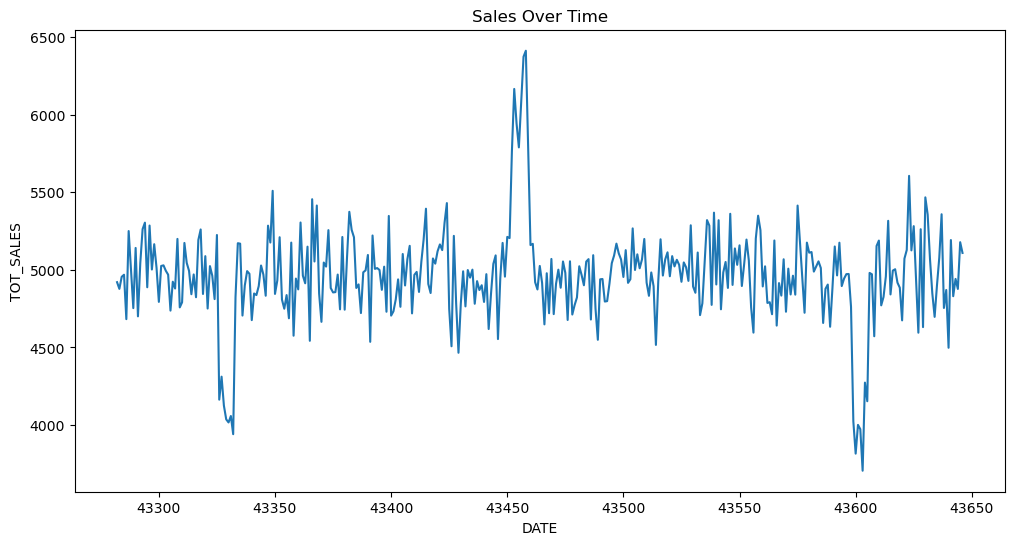

In [58]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='TOT_SALES', data = qvi_date_pat)
plt.title('Sales Over Time')
plt.show()

In [59]:
qvi_date_pat2 = qvi_com.groupby('DATE')['TXN_ID'].count().reset_index()

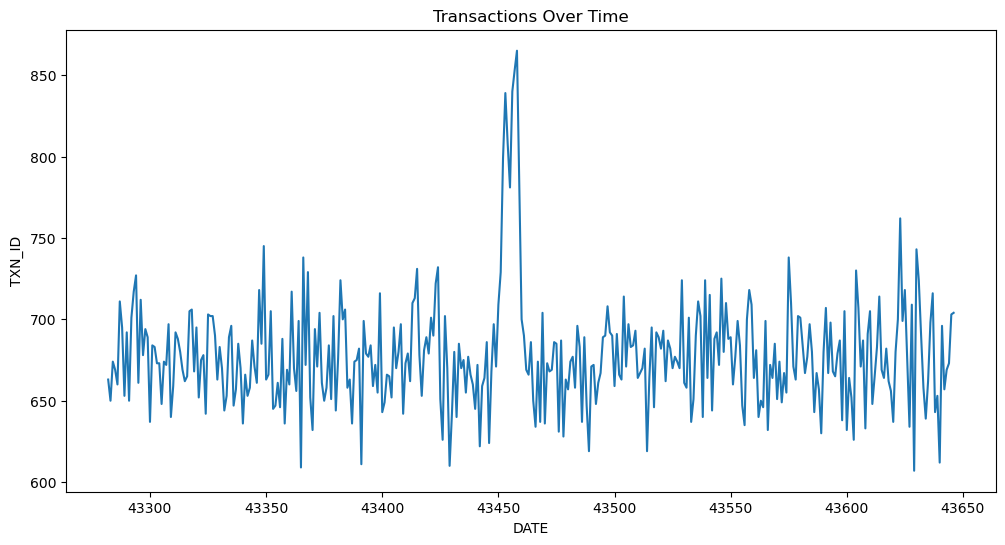

In [60]:
plt.figure(figsize=(12,6))
sns.lineplot(x='DATE', y='TXN_ID', data = qvi_date_pat2)
plt.title('Transactions Over Time')
plt.show()

Above we plotted date vs total sales and txn ids. We can see a clear spike around 43460. This infers a special season. Without being given  
actual dates I can't say more, but we could assume something like a chrismas period. The numbers range from 43300 to 43650 a range of 350,  
so that would suffice these are daily figures. In total sales we see 2 low spikes about 130 days before peak and 140 days after peak.  
If we assume the peak was Christmas those peak lows would occur in middle of March and August roughly. Those periods don't occur around any  
special season so no real pattern can be inferred. Overall the time series data shows fairly consistent sales throughout the year minus a few  
peaks.

# Segment Analysis Section
I will now begin Segment Analysis for Customer type and lifestage

### Average Packet Size by Lifestage and Customer Type


In [61]:
#Find average packet size per customer type
qvi_com.groupby('PREMIUM_CUSTOMER')['PACK_SIZE'].mean().reset_index()

,PREMIUM_CUSTOMER,PACK_SIZE
0,Budget,175.312694
1,Mainstream,175.975895
2,Premium,175.371084


In [62]:
#Find average packet size per customer segment
qvi_com.groupby('LIFESTAGE')['PACK_SIZE'].mean().reset_index()

,LIFESTAGE,PACK_SIZE
0,MIDAGE SINGLES/COUPLES,176.075776
1,NEW FAMILIES,175.166538
2,OLDER FAMILIES,175.202312
3,OLDER SINGLES/COUPLES,175.534395
4,RETIREES,175.880102
5,YOUNG FAMILIES,174.875438
6,YOUNG SINGLES/COUPLES,176.343166


It seems for all cutomer types and segments the average is around 174-175, indicating the 175g packet is  
the preferred size.

### Popular Brands by Count for Customer type and Lifestage


In [63]:
#group customer type by brand choice
brand_prem = qvi_com.groupby('PREMIUM_CUSTOMER')['BRAND'].value_counts().reset_index()

In [64]:
brand_prem.groupby('PREMIUM_CUSTOMER').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

,PREMIUM_CUSTOMER,BRAND,count
0,Budget,Kettle,14154
1,Budget,Smiths,11008
2,Budget,Doritos,8718
3,Mainstream,Kettle,16423
4,Mainstream,Smiths,11301
5,Mainstream,Doritos,10114
6,Premium,Kettle,10711
7,Premium,Smiths,8043
8,Premium,Pringles,6579


In [65]:
brand_life = qvi_com.groupby('LIFESTAGE')['BRAND'].value_counts().reset_index()

In [66]:
brand_life.groupby('LIFESTAGE').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)


,LIFESTAGE,BRAND,count
0,MIDAGE SINGLES/COUPLES,Kettle,4055
1,MIDAGE SINGLES/COUPLES,Smiths,2790
2,MIDAGE SINGLES/COUPLES,Doritos,2423
3,NEW FAMILIES,Kettle,1171
4,NEW FAMILIES,Smiths,727
5,NEW FAMILIES,Doritos,726
6,OLDER FAMILIES,Kettle,6851
7,OLDER FAMILIES,Smiths,6138
8,OLDER FAMILIES,Pringles,4244
9,OLDER SINGLES/COUPLES,Kettle,8847


For Customer types top 3 is same for all except Premium who have Pringles in 3rd.    

For Lifestage all have same top 3 except Older families and young singles/couples have pringles in 3rd.

In [67]:
qvi_com.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,PREMIUM_CUSTOMER,LIFESTAGE,TXN_ID,PROD_NBR,PROD_NAME,BRAND,PROD_QTY,PACK_SIZE,TOT_SALES
0,43390,1,1000,Premium,YOUNG SINGLES/COUPLES,1,5,Natural Chip Compny SeaSalt175g,Natural,2,175.0,6.0
1,43599,1,1307,Budget,MIDAGE SINGLES/COUPLES,348,66,CCs Nacho Cheese 175g,CCs,3,175.0,6.3
2,43605,1,1343,Budget,MIDAGE SINGLES/COUPLES,383,61,Smiths Crinkle Cut Chips Chicken 170g,Smiths,2,170.0,2.9
3,43329,2,2373,Budget,MIDAGE SINGLES/COUPLES,974,69,Smiths Chip Thinly S/Cream&Onion 175g,Smiths,5,175.0,15.0
4,43330,2,2426,Budget,MIDAGE SINGLES/COUPLES,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle,3,150.0,13.8


We can further do segment analysis on tot_sales, avg qty, popular products,  and store nbr analysis.

### Average Total Sales by Customer type and Lifestage

In [68]:
qvi_com.groupby('PREMIUM_CUSTOMER')['TOT_SALES'].mean().reset_index()

,PREMIUM_CUSTOMER,TOT_SALES
0,Budget,7.277458
1,Mainstream,7.374193
2,Premium,7.282771


In [69]:
qvi_com.groupby('LIFESTAGE')['TOT_SALES'].mean().reset_index()

,LIFESTAGE,TOT_SALES
0,MIDAGE SINGLES/COUPLES,7.373442
1,NEW FAMILIES,7.287664
2,OLDER FAMILIES,7.274899
3,OLDER SINGLES/COUPLES,7.403009
4,RETIREES,7.373994
5,YOUNG FAMILIES,7.275841
6,YOUNG SINGLES/COUPLES,7.175854


Interesting insights into average sales for customer type, on average they spend the same across each customer type. Differ by 0.10.  
Similar inisghts into Lifestage average sales. Lowest is Young single/couples at 7.18 and highest 7.40 for Older singles/couples. Very  
samll range. 

### Most popular product by Customer Type and Lifestage

In [70]:
cust_fav_prod = qvi_com.groupby(['PREMIUM_CUSTOMER','PROD_NAME'])['PROD_NBR'].value_counts().reset_index()
cust_fav_prod.head()

,PREMIUM_CUSTOMER,PROD_NAME,PROD_NBR,count
0,Budget,Burger Rings 220g,94,579
1,Budget,CCs Nacho Cheese 175g,66,564
2,Budget,CCs Original 175g,54,550
3,Budget,CCs Tasty Cheese 175g,91,565
4,Budget,Cheetos Chs & Bacon Balls 190g,18,534


In [71]:
cust_fav_prod.groupby('PREMIUM_CUSTOMER').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

,PREMIUM_CUSTOMER,PROD_NAME,PROD_NBR,count
0,Budget,Kettle Mozzarella Basil & Pesto 175g,102,1166
1,Budget,Cobs Popd Sea Salt Chips 110g,75,1132
2,Budget,Doritos Corn Chip Southern Chicken 150g,93,1132
3,Mainstream,Kettle Tortilla ChpsHny&Jlpno Chili 150g,108,1360
4,Mainstream,Tyrrells Crisps Ched & Chives 165g,112,1324
5,Mainstream,Kettle 135g Swt Pot Sea Salt,63,1316
6,Premium,Infuzions Thai SweetChili PotatoMix 110g,104,877
7,Premium,Dorito Corn Chp Supreme 380g,4,874
8,Premium,Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,33,865


We have found the 3 most popular products for each customer type.

In [72]:
life_fav_prod = qvi_com.groupby(['LIFESTAGE','PROD_NAME'])['PROD_NBR'].value_counts().reset_index()
life_fav_prod.head()

,LIFESTAGE,PROD_NAME,PROD_NBR,count
0,MIDAGE SINGLES/COUPLES,Burger Rings 220g,94,152
1,MIDAGE SINGLES/COUPLES,CCs Nacho Cheese 175g,66,156
2,MIDAGE SINGLES/COUPLES,CCs Original 175g,54,141
3,MIDAGE SINGLES/COUPLES,CCs Tasty Cheese 175g,91,136
4,MIDAGE SINGLES/COUPLES,Cheetos Chs & Bacon Balls 190g,18,141


In [73]:
life_fav_prod.groupby('LIFESTAGE').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

,LIFESTAGE,PROD_NAME,PROD_NBR,count
0,MIDAGE SINGLES/COUPLES,Infzns Crn Crnchers Tangy Gcamole 110g,31,344
1,MIDAGE SINGLES/COUPLES,Cheezels Cheese 330g,23,335
2,MIDAGE SINGLES/COUPLES,Twisties Chicken270g,113,335
3,NEW FAMILIES,Kettle Honey Soy Chicken 175g,88,107
4,NEW FAMILIES,Grain Waves Sweet Chilli 210g,24,104
5,NEW FAMILIES,Cobs Popd Sour Crm &Chives Chips 110g,2,102
6,OLDER FAMILIES,Smiths Crinkle Chips Salt & Vinegar 330g,16,589
7,OLDER FAMILIES,Thins Potato Chips Hot & Spicy 175g,28,579
8,OLDER FAMILIES,Infzns Crn Crnchers Tangy Gcamole 110g,31,570
9,OLDER SINGLES/COUPLES,Kettle 135g Swt Pot Sea Salt,63,740


We have found the top 3 chips for each lifestage.

### Most populat stores for Customer Type and Lifestage

In [74]:
qvi_com.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,PREMIUM_CUSTOMER,LIFESTAGE,TXN_ID,PROD_NBR,PROD_NAME,BRAND,PROD_QTY,PACK_SIZE,TOT_SALES
0,43390,1,1000,Premium,YOUNG SINGLES/COUPLES,1,5,Natural Chip Compny SeaSalt175g,Natural,2,175.0,6.0
1,43599,1,1307,Budget,MIDAGE SINGLES/COUPLES,348,66,CCs Nacho Cheese 175g,CCs,3,175.0,6.3
2,43605,1,1343,Budget,MIDAGE SINGLES/COUPLES,383,61,Smiths Crinkle Cut Chips Chicken 170g,Smiths,2,170.0,2.9
3,43329,2,2373,Budget,MIDAGE SINGLES/COUPLES,974,69,Smiths Chip Thinly S/Cream&Onion 175g,Smiths,5,175.0,15.0
4,43330,2,2426,Budget,MIDAGE SINGLES/COUPLES,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,Kettle,3,150.0,13.8


In [75]:
cust_pop_store=qvi_com.groupby('PREMIUM_CUSTOMER')['STORE_NBR'].value_counts().reset_index()
cust_pop_store.head()

,PREMIUM_CUSTOMER,STORE_NBR,count
0,Budget,226,714
1,Budget,93,712
2,Budget,213,675
3,Budget,43,661
4,Budget,168,656


In [76]:
y = cust_pop_store.groupby('PREMIUM_CUSTOMER').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)
y

,PREMIUM_CUSTOMER,STORE_NBR,count
0,Budget,226,714
1,Budget,93,712
2,Budget,213,675
3,Mainstream,226,749
4,Mainstream,238,703
5,Mainstream,58,693
6,Premium,165,566
7,Premium,100,522
8,Premium,88,509


We have found the most frequented stores for each customer type.

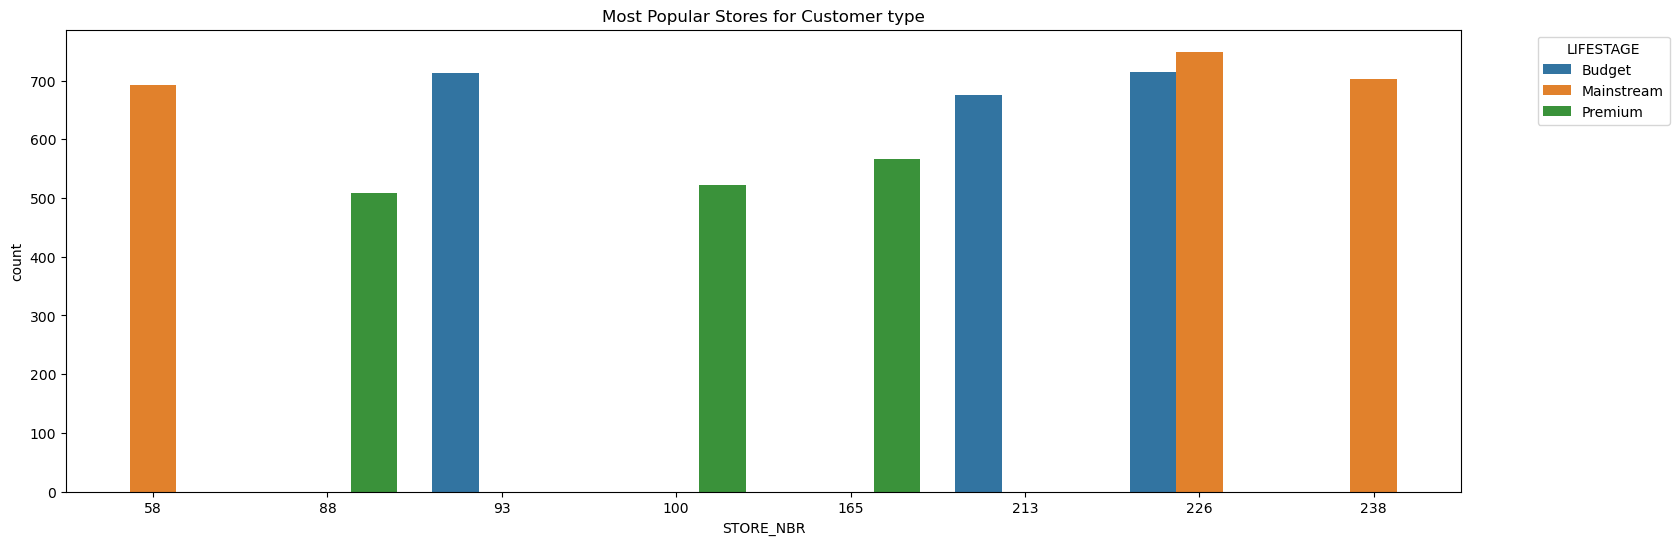

In [77]:

plt.figure(figsize=(18,6))
sns.barplot(data=y, x='STORE_NBR', y='count', hue='PREMIUM_CUSTOMER')
plt.title('Most Popular Stores for Customer type')
plt.legend(title='LIFESTAGE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Can see store 226 is very popular for Mainstream and budget. Both are essentially the most visted for each of those categories.  
165 is most popular store for premium.

In [78]:
life_pop_store=qvi_com.groupby('LIFESTAGE')['STORE_NBR'].value_counts().reset_index()
life_pop_store.head()

,LIFESTAGE,STORE_NBR,count
0,MIDAGE SINGLES/COUPLES,165,224
1,MIDAGE SINGLES/COUPLES,201,207
2,MIDAGE SINGLES/COUPLES,226,204
3,MIDAGE SINGLES/COUPLES,125,200
4,MIDAGE SINGLES/COUPLES,88,199


In [79]:
x = life_pop_store.groupby('LIFESTAGE').apply(lambda x : x.nlargest(3,'count')).reset_index(drop=True)
x

,LIFESTAGE,STORE_NBR,count
0,MIDAGE SINGLES/COUPLES,165,224
1,MIDAGE SINGLES/COUPLES,201,207
2,MIDAGE SINGLES/COUPLES,226,204
3,NEW FAMILIES,238,73
4,NEW FAMILIES,4,70
5,NEW FAMILIES,231,65
6,OLDER FAMILIES,43,514
7,OLDER FAMILIES,93,476
8,OLDER FAMILIES,63,465
9,OLDER SINGLES/COUPLES,226,461


We have found the most frequented stores for each customer type.

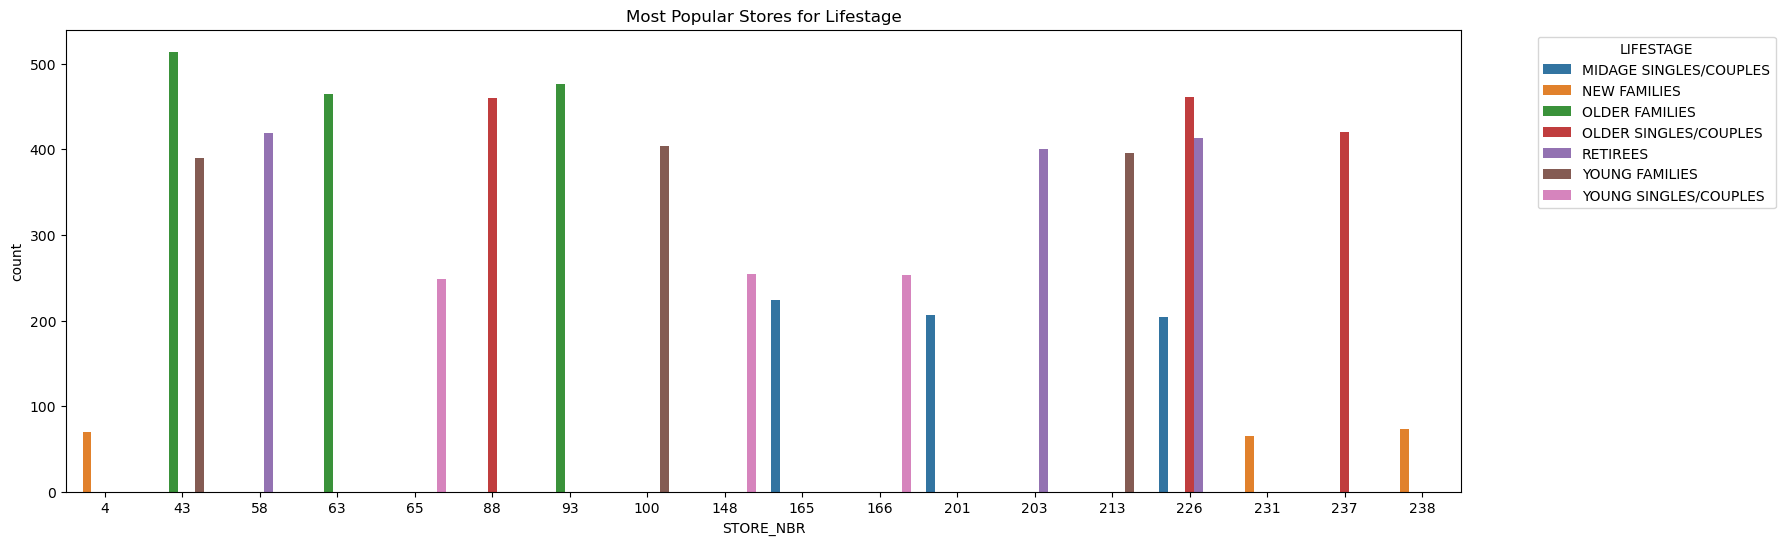

In [80]:
plt.figure(figsize=(18,6))
sns.barplot(data=x, x='STORE_NBR', y='count', hue='LIFESTAGE')
plt.title('Most Popular Stores for Lifestage')
plt.legend(title='LIFESTAGE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

We see store 226 is most popular for Older singles/couples and Retirees. In customer type this store was most popular for mianstream and budget.  
226 is most promiment store from data. Can be a good geographical target for marketing.

####Grouping Lifestage by Customer Type for Total Sales

In [81]:
life_cust_sales = qvi_com.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER'])['TOT_SALES'].sum().reset_index()
life_cust_sales

,LIFESTAGE,PREMIUM_CUSTOMER,TOT_SALES
0,MIDAGE SINGLES/COUPLES,Budget,33345.70
1,MIDAGE SINGLES/COUPLES,Mainstream,84734.25
2,MIDAGE SINGLES/COUPLES,Premium,54443.85
3,NEW FAMILIES,Budget,20607.45
4,NEW FAMILIES,Mainstream,15979.70
5,NEW FAMILIES,Premium,10760.80
6,OLDER FAMILIES,Budget,156863.75
7,OLDER FAMILIES,Mainstream,96413.55
8,OLDER FAMILIES,Premium,75242.60
9,OLDER SINGLES/COUPLES,Budget,127833.60


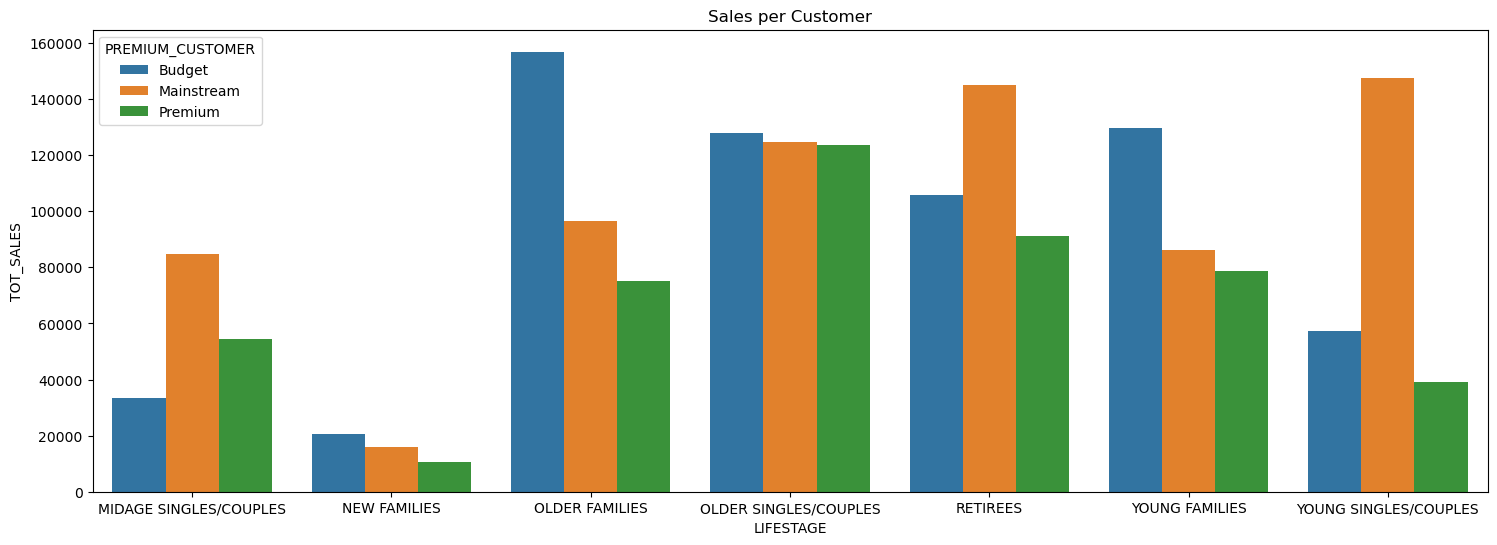

In [82]:
plt.figure(figsize=(18,6))
sns.barplot(x='LIFESTAGE', y='TOT_SALES', hue = 'PREMIUM_CUSTOMER', data = life_cust_sales)
plt.title('Sales per Customer')
plt.show()

Buget older families spend the most interestingly, followed by mainstream young singles/couples and retirees. New families don't spend   
much at all showing they probably are on a tight budget.  
Older Singles/couples spend the most as a whole. They probably have the most money.  
The top 3 categories we are interested in are:  
1. Young Singles/Couples Mainstream
2. Retirees Mainstream
3. Older Families budget

## T-test analysis for Popular Categories
We will perform a two sided t-test to determine if population means are singificantly different in above top categories.

In [83]:
import statsmodels.stats.weightstats as smw

In [84]:
#we are getting array for tot_sales column to perform t-test for young singles/couples mainstream
sample1 = qvi_com[(qvi_com['LIFESTAGE']== 'YOUNG SINGLES/COUPLES')&(qvi_com['PREMIUM_CUSTOMER']=='Mainstream')]['TOT_SALES'].values
sample2 = qvi_com[(qvi_com['LIFESTAGE']== 'YOUNG SINGLES/COUPLES')&(qvi_com['PREMIUM_CUSTOMER']=='Budget')]['TOT_SALES'].values


In [85]:
t_test = smw.ttest_ind(sample1, sample2)
t_test

(27.228142564685307, 3.7249273038216815e-161, 28115.0)

In [86]:
#we are getting array for tot_sales column to perform t-test.
sample1 = qvi_com[(qvi_com['LIFESTAGE']== 'YOUNG SINGLES/COUPLES')&(qvi_com['PREMIUM_CUSTOMER']=='Mainstream')]['TOT_SALES'].values
sample3 = qvi_com[(qvi_com['LIFESTAGE']== 'YOUNG SINGLES/COUPLES')&(qvi_com['PREMIUM_CUSTOMER']=='Premium')]['TOT_SALES'].values


In [87]:
t_test = smw.ttest_ind(sample1, sample3)
t_test

(23.49376558153043, 9.181853523410995e-121, 25394.0)

### Results 1  
p-value is 0.000 to 3 dp. for both. We can reject null hypothesis and hence the means are statistically different for mainstream and others for  
Young Singles/couples mainstream category. Hence, this is a statistcally significant category we should look into more.  
We will repeat for other top 2.

In [88]:
#we are getting array for tot_sales column to perform t-test for older families budget
sample4 = qvi_com[(qvi_com['LIFESTAGE']== 'OLDER FAMILIES')&(qvi_com['PREMIUM_CUSTOMER']=='Budget')]['TOT_SALES'].values
sample5 = qvi_com[(qvi_com['LIFESTAGE']== 'OLDER FAMILIES')&(qvi_com['PREMIUM_CUSTOMER']=='Premium')]['TOT_SALES'].values


In [89]:
t_test = smw.ttest_ind(sample4, sample5)
t_test

(2.0078235087289023, 0.04467046186910623, 31915.0)

In [90]:
sample4 = qvi_com[(qvi_com['LIFESTAGE']== 'OLDER FAMILIES')&(qvi_com['PREMIUM_CUSTOMER']=='Budget')]['TOT_SALES'].values
sample6 = qvi_com[(qvi_com['LIFESTAGE']== 'OLDER FAMILIES')&(qvi_com['PREMIUM_CUSTOMER']=='Mainstream')]['TOT_SALES'].values

In [91]:
t_test = smw.ttest_ind(sample4, sample6)
t_test

(0.3647043340538335, 0.7153343421326386, 34753.0)

### Results 2  
Interestingly here we can reject null at 5% level comparing budget and premium for older families, however, we can't reject null  
for budget and mainstream. This means older families budget is not a statistically significant category and we won't analyse  
further.

In [92]:
sample8 = qvi_com[(qvi_com['LIFESTAGE']== 'RETIREES')&(qvi_com['PREMIUM_CUSTOMER']=='Budget')]['TOT_SALES'].values
sample7 = qvi_com[(qvi_com['LIFESTAGE']== 'OLDER FAMILIES')&(qvi_com['PREMIUM_CUSTOMER']=='Mainstream')]['TOT_SALES'].values

In [93]:
t_test = smw.ttest_ind(sample7, sample8)
t_test

(-5.540699495676437, 3.040271269150497e-08, 27464.0)

In [94]:
sample9 = qvi_com[(qvi_com['LIFESTAGE']== 'RETIREES')&(qvi_com['PREMIUM_CUSTOMER']=='Premium')]['TOT_SALES'].values
sample7 = qvi_com[(qvi_com['LIFESTAGE']== 'OLDER FAMILIES')&(qvi_com['PREMIUM_CUSTOMER']=='Mainstream')]['TOT_SALES'].values

In [95]:
t_test = smw.ttest_ind(sample7, sample9)
t_test

(-5.878064861107283, 4.202588241542294e-09, 25475.0)

### Results 3  
We can reject null for both cases as p-value is 0.000 to 3 dp. Therefore means are statistically different and I will look  
further into this category.

## Brand Affinity for Statistically Sig. Top Categories
Lets analyse the brand affinity for top 2 statistically different categories as we would want to target them further.

In [96]:
#Make a copy of qvi_com df for safety measures
aff = qvi_com.copy()

In [97]:
#Groups Retirees Mainstream by brand product quantity
aff_1 = aff[(aff['LIFESTAGE']=='RETIREES') & (aff['PREMIUM_CUSTOMER']=='Mainstream')].groupby('BRAND')['PROD_QTY'].sum().reset_index()

In [98]:
#Groups everything else
aff_2 = aff[(aff['LIFESTAGE']!='RETIREES')& (aff['PREMIUM_CUSTOMER']!='Mainstream')].groupby('BRAND')['PROD_QTY'].sum().reset_index()

In [99]:
#Finds proportion of Retirees Mainstream
a = aff_1['PROD_QTY']/aff_1['PROD_QTY'].sum()

In [100]:
#Finds proportion of everything else
b = aff_2['PROD_QTY']/aff_2['PROD_QTY'].sum()

In [101]:
#Find brand affinity for Retirees Mainstream and adds back as a new column in df
aff_1['AFF']=a/b
aff_1.sort_values('AFF', ascending=False)

,BRAND,PROD_QTY,AFF
7,Grain,1029,1.110906
20,Twisties,1516,1.089263
5,Doritos,3974,1.074817
18,Thins,2279,1.072736
13,Pringles,3995,1.070203
10,Kettle,6428,1.058838
4,Cobs,1488,1.051431
9,Infuzions,2246,1.047811
21,Tyrrells,969,1.030720
19,Tostitos,1412,1.012249


Mainstream Retirees are 11% more likely to purchase Grain chips and roughly 23% less likely to purchase French chips.

In [102]:
#Groups Young Singles/Couples Mainstream by brand product quantity
aff_3 = aff[(aff['LIFESTAGE']=='YOUNG SINGLES/COUPLES') & (aff['PREMIUM_CUSTOMER']=='Mainstream')].groupby('BRAND')['PROD_QTY'].sum().reset_index()

In [103]:
#Groups everything else
aff_4 = aff[(aff['LIFESTAGE']!='YOUNG SINGLES/COUPLES')& (aff['PREMIUM_CUSTOMER']!='Mainstream')].groupby('BRAND')['PROD_QTY'].sum().reset_index()

In [104]:
#Find proportion of Young Singles/Couples Mainstream by brand product quantity
c = aff_3['PROD_QTY']/aff_3['PROD_QTY'].sum()

In [105]:
#Finds proportion of everything else
d = aff_4['PROD_QTY']/aff_4['PROD_QTY'].sum()

In [106]:
#Find brand affinity for Young Singles/Couples Mainstream and adds back as a new column in df
aff_3['AFF']=c/d
aff_3.sort_values('AFF', ascending=False)

,BRAND,PROD_QTY,AFF
21,Tyrrells,1143,1.227016
20,Twisties,1673,1.217496
5,Doritos,4447,1.213388
10,Kettle,7172,1.188658
19,Tostitos,1645,1.184091
13,Pringles,4326,1.181081
7,Grain,1055,1.170011
4,Cobs,1617,1.160950
9,Infuzions,2343,1.126613
18,Thins,2187,1.056209


Mainstream Young Couples/Singles are roughly 23% more likely to purchase Tryells and roughly 55% less likely to purchase  
Buger chips.

# Conclusions

We have finally finished initial data analysis after first cleaning the data, then looking at general insights  
on whole data, and lastly dived deeper with segment analysis on customer type and lifestage.  
The last analysis on the two top statiscally different categories show great insights into the top brands they  
are likely to purchase vs what they are not likely to purchase. We can use this kind of data analysis to drive highly  
targeted marketing to maximise furture sales. 